<a href="https://colab.research.google.com/github/ddodds42/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/DAVID_DODDS_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head(20)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
dfu.isnull().sum()

NameError: ignored

In [3]:
dfu.dtypes

NameError: ignored

In [4]:
dfu = df.drop('diagnosis', axis=1).drop('id', axis=1).drop('Unnamed: 32', axis=1)
print(dfu.shape)
dfu.head()

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


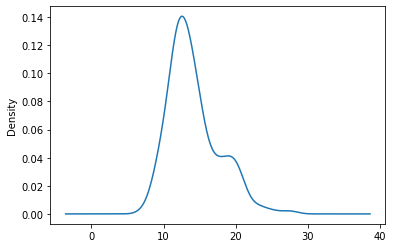

In [5]:
dfu['radius_mean'].plot.density()

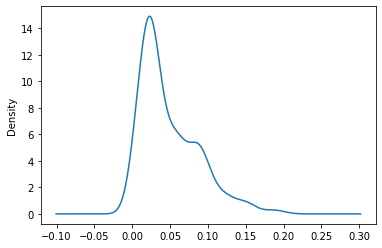

In [6]:
dfu['concave points_mean'].plot.density()

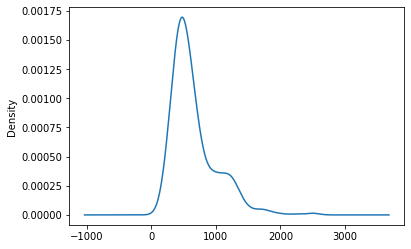

In [7]:
dfu['area_mean'].plot.density()

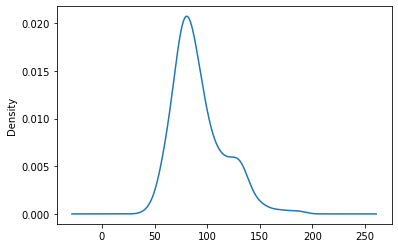

In [8]:
dfu['perimeter_mean'].plot.density()

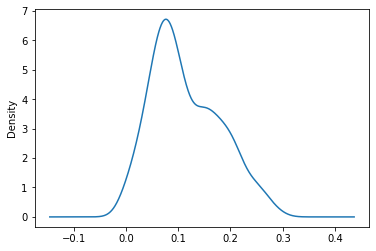

In [9]:
dfu['concave points_worst'].plot.density()

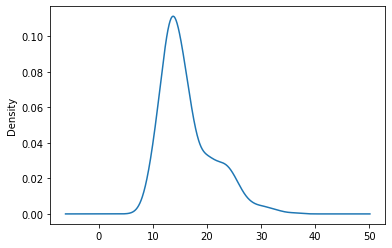

In [10]:
dfu['radius_worst'].plot.density()

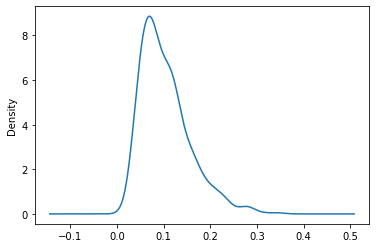

In [11]:
dfu['compactness_mean'].plot.density()

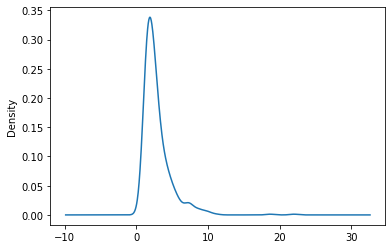

In [12]:
dfu['perimeter_se'].plot.density()

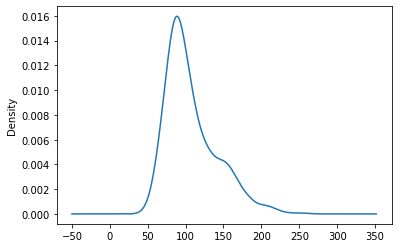

In [13]:
dfu['perimeter_worst'].plot.density()

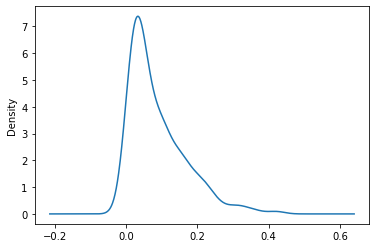

In [14]:
dfu['concavity_mean'].plot.density()

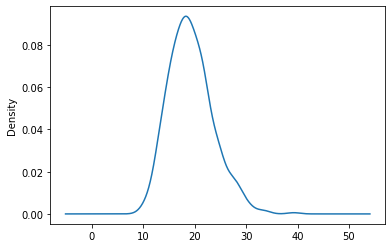

In [15]:
dfu['texture_mean'].plot.density()

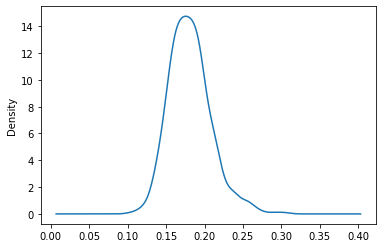

In [16]:
dfu['symmetry_mean'].plot.density()

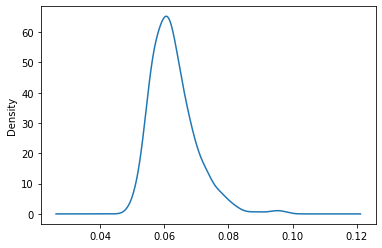

In [17]:
dfu['fractal_dimension_mean'].plot.density()

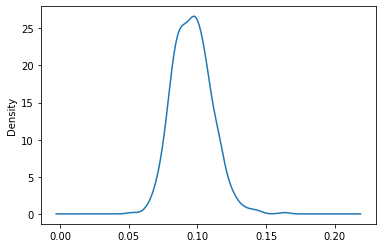

In [18]:
dfu['smoothness_mean'].plot.density()

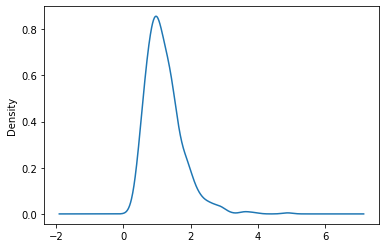

In [19]:
dfu['texture_se'].plot.density()

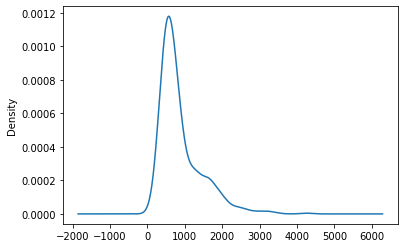

In [20]:
dfu['area_worst'].plot.density()

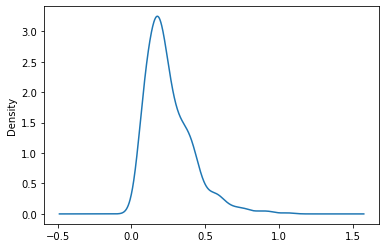

In [21]:
dfu['compactness_worst'].plot.density()

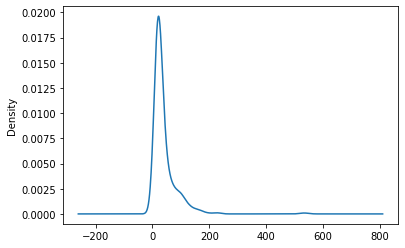

In [22]:
dfu['area_se'].plot.density()

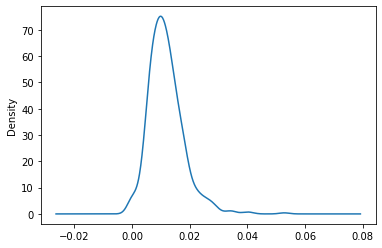

In [23]:
dfu['concave points_se'].plot.density()

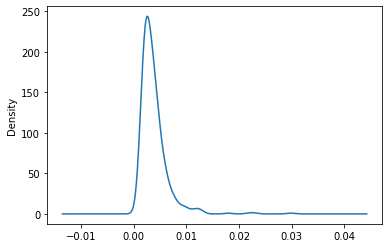

In [24]:
dfu['fractal_dimension_se'].plot.density()

In [0]:
# The features "radius_mean" and "concave points_mean" appear to be the most
# bimodal... they might tell us the most about the distinction between benign and
# malignant. I will use these two features for the K-means scatterplot.

In [26]:
df_no_pca = pd.DataFrame(dict(x=dfu['radius_mean'],
                              y=dfu['concave points_mean']))
print(df_no_pca.shape)
df_no_pca.head()

(569, 2)


,x,y
0,17.99,0.14710
1,20.57,0.07017
2,19.69,0.12790
3,11.42,0.10520
4,20.29,0.10430


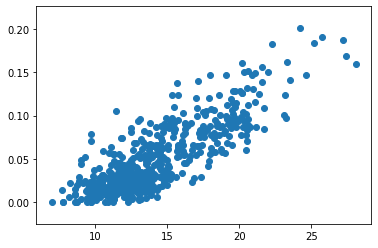

In [27]:
# The eyeball test of these two features is less than promising.

plt.scatter(df_no_pca.x, df_no_pca.y)
plt.show()

In [0]:
sum_sq_distances = []
K = range(1,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(df_no_pca)
  sum_sq_distances.append(km.inertia_)

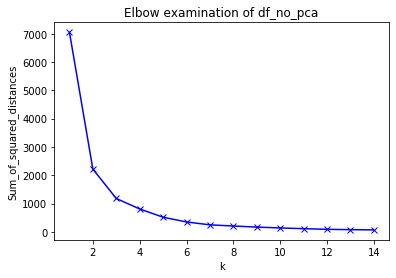

In [29]:
plt.plot(K, sum_sq_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow examination of df_no_pca')
plt.show()

In [0]:
# It looks like the sharpest "elbows" are at k=2,3... I'm just going to make a
# judgement call in favor of 2 clusters because there are 2 types of diagnoses
# we're mostly concerned with: benign and malignant.

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.
- Perform K-Means Clustering on the Dataset


In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_no_pca)
labels = kmeans.labels_

print(labels)

[0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1
 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0
 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 0 0 

In [32]:
klabels = pd.Series(labels)
df_no_pca['cluster'] = klabels.values

df_no_pca.head()

,x,y,cluster
0,17.99,0.14710,0
1,20.57,0.07017,0
2,19.69,0.12790,0
3,11.42,0.10520,1
4,20.29,0.10430,0


In [0]:
def get_centroids(df,column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  # ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  # ax.set_aspect('equal')
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()

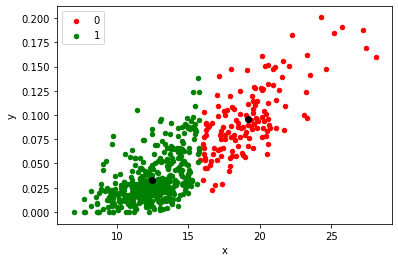

In [35]:
centroids = get_centroids(df_no_pca, 'cluster')
plot_clusters(df_no_pca, 'cluster', centroids)

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
diagnosis_binary = []
for s in df['diagnosis']:
  if s == 'M':
    diagnosis_binary.append(0)
  else:
    diagnosis_binary.append(1)

diagnosis_binary

In [37]:
# I'm going to start with the metrics from a confusion matrix, and then
# visualize the results with a scatter plot.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

actual = diagnosis_binary
predicted = df_no_pca['cluster']

results = confusion_matrix(actual, predicted)
print ('Confusion Matrix:')
print(results)
print ('Accuracy Score:', accuracy_score(actual, predicted))
print ('Report:')
print (classification_report(actual, predicted))

Confusion Matrix:
[[136  76]
 [  6 351]]
Accuracy Score: 0.8558875219683656
Report:
              precision    recall  f1-score   support

           0       0.96      0.64      0.77       212
           1       0.82      0.98      0.90       357

    accuracy                           0.86       569
   macro avg       0.89      0.81      0.83       569
weighted avg       0.87      0.86      0.85       569



In [0]:
# An f1 weighted accuracy of about 85%. Not bad. We'll compare that the the PCA
# predictions later...

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [39]:
dfu.isnull().sum().any()

False

In [40]:
cat_cols = dfu.columns[dfu.dtypes=='object']
num_cols = dfu.columns[dfu.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

0 categorical columns
30 numerical columns


In [41]:
print(df.shape)
print(dfu.shape)
dfu.head()

(569, 33)
(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
scaler = StandardScaler()
dfu_processed = scaler.fit_transform(dfu)
dfu_processed

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [43]:
pca = PCA(30)
pca_features = pca.fit_transform(dfu_processed)
pca_features

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [44]:
evr = pca.explained_variance_ratio_
evr

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [45]:
ev = 0

for i in range(len(evr)):
  if ev >= 0.9:
    print(i-1)
  else:
    ev = evr[:i].sum()


7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [48]:
evr[:7].sum()

0.9100953006967308

In [0]:
# This shows me that I only need the first 7 principle components to retain
# 90 of the explained variance.

In [83]:
X = dfu
scaler = StandardScaler()
Z = scaler.fit_transform(X)

pca = PCA(7)
B = pca.fit_transform(Z)

B

array([[ 9.19283683,  1.94858307, -1.12316617, ..., -1.19510975,
         1.41142378,  2.15933766],
       [ 2.3878018 , -3.76817174, -0.52929267, ...,  0.62177475,
         0.02865686,  0.01337549],
       [ 5.73389628, -1.0751738 , -0.55174759, ..., -0.17708576,
         0.54145206, -0.66818121],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  1.8099913 ,
        -0.53444706, -0.19275758],
       [10.37479406,  1.6720101 , -1.87702934, ..., -0.03374172,
         0.56793599,  0.22306573],
       [-5.4752433 , -0.67063679,  1.49044308, ..., -0.18470312,
         1.61783695,  1.69893709]])

In [84]:
Bplot = pd.DataFrame(B)
Bplot

,0,1,2,3,4,5,6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159338
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028657,0.013375
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668181
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936206
...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596149
565,3.793382,-3.584048,2.088476,-2.506028,-0.510722,-0.246710,-0.716334
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223066


In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(Bplot)
labels = kmeans.labels_

print(labels)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

In [86]:
klabels = pd.Series(labels)
Bplot['cluster'] = klabels.values

Bplot.head()

,0,1,2,3,4,5,6,cluster
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159338,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028657,0.013375,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668181,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936206,0


In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

actual = diagnosis_binary
predicted = Bplot['cluster']

results = confusion_matrix(actual, predicted)
print ('Confusion Matrix:')
print(results)
print ('Accuracy Score:', accuracy_score(actual, predicted))
print ('Report:')
print (classification_report(actual, predicted))

Confusion Matrix:
[[175  37]
 [ 14 343]]
Accuracy Score: 0.9103690685413005
Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



In [0]:
# So I did this in reverse order. I consulted the explained variance ratios first
# and did a K-Means test on 7 PC's. It had a f1-score weighted average of 6%
# points higher than the K=Means test with the 2 original features. 

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [66]:
# Now I will run K-Means on just PC1 and PC2 to demonstrate the clusters in a
# scatter plot.

X = dfu
scaler = StandardScaler()
Z = scaler.fit_transform(X)

pca = PCA(2)
C = pca.fit_transform(Z)

C

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.6720101 ],
       [-5.4752433 , -0.67063679]])

In [97]:
Cplot = pd.DataFrame(C, columns=['x','y'])
Cplot

,x,y
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [98]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Cplot)
labels = kmeans.labels_

print(labels)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

In [99]:
klabels = pd.Series(labels)
Cplot['cluster'] = klabels.values

Cplot.head()

,x,y,cluster
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

actual = diagnosis_binary
predicted = Cplot['cluster']

results = confusion_matrix(actual, predicted)
print ('Confusion Matrix:')
print(results)
print ('Accuracy Score:', accuracy_score(actual, predicted))
print ('Report:')
print (classification_report(actual, predicted))

Confusion Matrix:
[[175  37]
 [ 16 341]]
Accuracy Score: 0.9068541300527241
Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



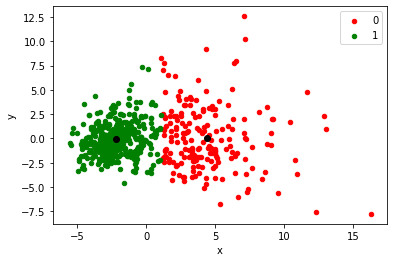

In [100]:
# In running both K-means tests multiple times, the 7 dimensional PCA and the
# 2 dimensional PCA yeilded identical weighted accuracies. And now for the plot!

centroids = get_centroids(Cplot, 'cluster')
plot_clusters(Cplot, 'cluster', centroids)

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project